*Import library's*

In [3]:
import numpy as np
import pandas as pd
from textblob import TextBlob as tb
import tweepy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob.classifiers import NaiveBayesClassifier
import os, re, nltk, string
from bs4 import BeautifulSoup
from collections import OrderedDict
from operator import itemgetter

*Twitter authentication*

In [4]:
consumer_key = 'Jg95VukOglg6RIqRrqt6GYRoa'
consumer_secret = 'ZvH3Oz7jFN0OvDMXGtRriTqOOykGnUgqxAU0wNKWhMElII0ivq'
access_token = '971179238396227584-KkOSGzCwhzv0lokz55Dkp1wTjyurnkW'
access_token_secret = 'y2NNUWU1tlhQYMOps49aSKgckRqTu7T7dPWpyNbMeXvAA'

In [74]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    alltweets = []
    new_tweets = api.search(screen_name)
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    while len(new_tweets) > 0:
        new_tweets = api.search(screen_name, count=200, max_id=oldest)
        alltweets.extend(new_tweets)
        oldest = alltweets[-1].id - 1
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    return outtweets

*Get all tweets*

In [75]:
public_tweets = get_all_tweets('@falanext')
df = pd.DataFrame(public_tweets, columns=['id','created_at','text'])
df

,id,created_at,text
0,1061210330192322561,2018-11-10 10:53:53,b'@falanext RESPONDE MEU PROBLEMA'
1,1061135761502859264,2018-11-10 05:57:35,b'N\xc3\xa3o t\xc3\xb4 conseguindo acessar min...
2,1061111316146995200,2018-11-10 04:20:26,b'@itau @Itaucard @credicard Aprendam com o @f...
3,1061101587916034048,2018-11-10 03:41:47,b'RT @falanext: J\xc3\xa1 pode come\xc3\xa7ar ...
4,1061100614673973248,2018-11-10 03:37:55,b'Mais um nen\xc3\xa9m para acabar com a minha...
5,1061095602895966208,2018-11-10 03:18:00,b'@falanext mtv world stage pq me matastes'
6,1061091060292747264,2018-11-10 02:59:57,b'@_unmAsked @falanext n\xc3\xa3o fui \xe2\x80...
7,1061090925429039104,2018-11-10 02:59:25,b'@_unmAsked @falanext eu comprei o meu assim'
8,1061089146498879488,2018-11-10 02:52:21,b'Al\xc3\xb4 @falanext cad\xc3\xaa meu limite ...
9,1061089035320483840,2018-11-10 02:51:54,b'@falanext @AndrezzaAl'


*Data Cleaning*

In [76]:
def cleanTweets(tweetsDF):
    table = str.maketrans(dict.fromkeys(string.punctuation.replace('@','')))
    # essa regex significa:
    # tudo que conter @ OU http OU terminador de linha seguido de uma palavra OU um espaco OU qualquer outro terminador
    # de linha.
    rePattern1 = '(@|http|\\n)(\w+|\s|\S)'
    formattedTweets = []
    for line in tweetsDF['text']:
        formattedStr = line.decode('utf-8').lower()
        formattedStr = formattedStr.translate(table)
        formattedStr = re.sub(rePattern1, "", formattedStr)  
        formattedTweets.append(formattedStr)
    return formattedTweets

formattedTweets = cleanTweets(df)
data = pd.DataFrame(formattedTweets, columns=['text'])
data

,text
0,responde meu problema
1,não tô conseguindo acessar minha conta do er...
2,aprendam com o e lançem uma atualização c...
3,rt já pode começar a fazer os planos pra abri...
4,mais um neném para acabar com a minha vida jun...
5,mtv world stage pq me matastes
6,não fui “eu” mas foi kkk
7,eu comprei o meu assim
8,alô cadê meu limite de crédito que não libera...
9,


*Stopwords in portuguese*

In [77]:
stopwords = nltk.corpus.stopwords.words('portuguese')
# Inclusão de novas stopwords 
stopwords.append('tô')
stopwords.append('pra')
stopwords.append('pro')
stopwords.append('é')
stopwords.append('aí')
stopwords.append('ser')
stopwords.append('pq')

*WordCloud*

(-0.5, 399.5, 199.5, -0.5)

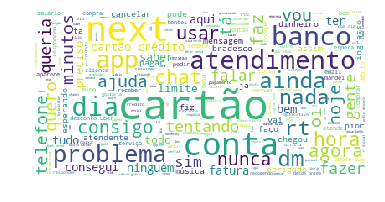

In [78]:
text = " ".join(tweet for tweet in data['text'])
wordcloud = WordCloud(max_font_size = 50, stopwords = stopwords, background_color = 'white').generate(text)
wordcloud.to_file("nouns_user.png")
plt.imshow(wordcloud)
plt.axis("off")

*Basic statistics about the data*

In [79]:
def word_count(str):
    counts = OrderedDict()
    words = str.split()
    for word in words:
        if word not in stopwords:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
    return counts

print("There are {} words in the combination of all tweets.".format(len(text)))

counts = sorted(word_count(text).items(), key = itemgetter(1), reverse = True)
display(counts[:10])

There are 43488 words in the combination of all tweets.


[('cartão', 108),
 ('conta', 65),
 ('next', 63),
 ('app', 40),
 ('banco', 34),
 ('atendimento', 34),
 ('rt', 28),
 ('crédito', 28),
 ('dm', 28),
 ('ainda', 25)]

*Transform occurrences in a dataframe*

In [80]:
wordcount = pd.DataFrame(counts, columns=['word', 'counts'])
top10 = wordcount[:10]
top10

,word,counts
0,cartão,108
1,conta,65
2,next,63
3,app,40
4,banco,34
5,atendimento,34
6,rt,28
7,crédito,28
8,dm,28
9,ainda,25


*Top 10 most used words*

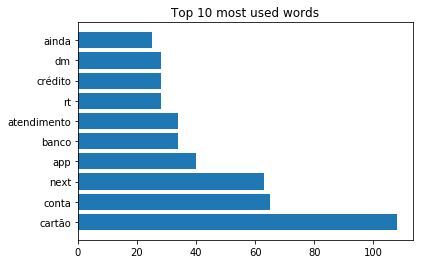

In [81]:
# Dataset
height = top10.counts
bars = top10.word
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

# Create title
plt.title('Top 10 most used words')
 
# Show graphic
plt.show()

*ReLi Lexicon - portuguese sentimental analysis*

In [82]:
base_path = '/Users/gayr/documents/gabriela/mba/tcc/ReLi-Lex'
allData = []
files = [os.path.join(base_path, f) for f in os.listdir(base_path)]
for file in files:
    t = 'pos' if '_Positivos' in file else 'neg'
    with open(file, 'r', encoding = 'latin-1') as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            allData.append((w[1:-1], t))
allDataDF = pd.DataFrame(allData, columns=['word', 'sentiment'])
allDataDF

,word,sentiment
0,aborrecente,neg
1,anacrônico,neg
2,arrombado,neg
3,besta,neg
4,bizarro,neg
5,bobo,neg
6,burro,neg
7,cansativo,neg
8,chato,neg
9,chocante,neg


*Validate the model and avoid overfit*

Functions

In [83]:
# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# A random forest classifier
from sklearn.ensemble import RandomForestClassifier
# A naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
# Encode labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
# Accuracy classification score
from sklearn.metrics import accuracy_score
# This classifier is useful as a simple baseline to compare with other (real) classifiers
from sklearn.dummy import DummyClassifier

Original Variables

In [84]:
X_original = allDataDF.word
Y_original = allDataDF.sentiment

O Naive Bayes do sklearn precisa que as variáveis independentes sejam contínuas - por esse motivo precisaremos transformar palavras em números

In [85]:
le_x = LabelEncoder()
X_labelEncoded = le_x.fit_transform(X_original)
le_y = LabelEncoder()
Y_labelEncoded = le_y.fit_transform(Y_original)

O que faz o zip? Entender melhor...

In [86]:
zippedEncoded = list(zip(X_labelEncoded, Y_labelEncoded))
dfEncoded = pd.DataFrame(zippedEncoded, columns = ['word', 'sentiment'])

Cross Validation - Divisão da amostra entre treino e teste - scikitlearn

In [87]:
X_labelEncodedDF = dfEncoded.word
Y_labelEncodedDF = dfEncoded.sentiment
X_train, X_test, y_train, y_test = train_test_split(X_labelEncodedDF, Y_labelEncodedDF, test_size=0.30, random_state = 13)

Random Forest Classifier

In [88]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = rf.predict(X_test.values.reshape(-1, 1))

Naive Bayes Classifier

In [89]:
nb = MultinomialNB()
nb.fit(X_train.values.reshape(-1, 1), y_train)
y_nb_pred = rf.predict(X_test.values.reshape(-1, 1))

Dummy Model

In [90]:
dm = DummyClassifier()
dm.fit(X_train.values.reshape(-1, 1), y_train)
y_dummy_pred = dm.predict(X_test.values.reshape(-1, 1))

Acurácia dos modelos

In [91]:
print('Accuracy random forest on test dataset: {}'.format(round(accuracy_score(y_test, y_pred), 2)))
print('Accuracy naive bayes on test dataset: {}'.format(round(accuracy_score(y_test, y_nb_pred), 2)))
print('Accuracy dummy model on test dataset: {}'.format(round(accuracy_score(y_test, y_dummy_pred), 2)))

Accuracy random forest on test dataset: 0.7
Accuracy naive bayes on test dataset: 0.7
Accuracy dummy model on test dataset: 0.46


O nível de acurácia do Random Forest foi igual a Naive Bayes e melhor que o Dummy, por esse motivo iremos utilizar o Random Forest para a análise de sentimentos

In [92]:
# tweetsDataLabelEncoder = LabelEncoder()
tweet_text = data.text
tweetsEncoded = le_x.fit_transform(tweet_text)
y_pred_total = rf.predict(tweetsEncoded.reshape(-1, 1))
y_pred_total_decoded = le_y.inverse_transform(y_pred_total)
data['sentiment'] = y_pred_total_decoded
data

C:\Users\GAYR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,text,sentiment
0,responde meu problema,neg
1,não tô conseguindo acessar minha conta do er...,pos
2,aprendam com o e lançem uma atualização c...,pos
3,rt já pode começar a fazer os planos pra abri...,pos
4,mais um neném para acabar com a minha vida jun...,pos
5,mtv world stage pq me matastes,pos
6,não fui “eu” mas foi kkk,pos
7,eu comprei o meu assim,pos
8,alô cadê meu limite de crédito que não libera...,neg
9,,pos


*Counting positives and negatives*

In [93]:
df = data.groupby('sentiment').count()
df

,text
sentiment,
neg,216
pos,447


*Sentimental Analysis Graph based on Naive-Bayes Classification*

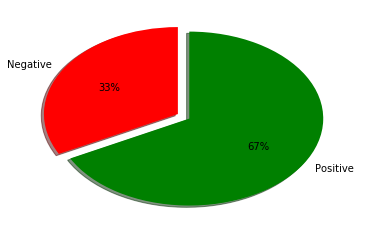

In [94]:
pie_pos = df.loc['pos']
pie_neg = df.loc['neg']

slices = [pie_neg, pie_pos]
tweets = ['Negative', 'Positive']
columns = ['Red', 'Green']
 
plt.pie(slices, labels = tweets, colors = columns, startangle = 90, shadow = True, explode = (0.1, 0), autopct='%1.0f%%')

plt.show()

*Positive WordCloud*

In [95]:
# filtrar dataframe com tweets positivos
data_pos_filtered = data[data['sentiment'] == 'pos']
data_pos_filtered

,text,sentiment
1,não tô conseguindo acessar minha conta do er...,pos
2,aprendam com o e lançem uma atualização c...,pos
3,rt já pode começar a fazer os planos pra abri...,pos
4,mais um neném para acabar com a minha vida jun...,pos
5,mtv world stage pq me matastes,pos
6,não fui “eu” mas foi kkk,pos
7,eu comprei o meu assim,pos
9,,pos
11,ae enquanto vc rejeita td mundo a até lançou...,pos
13,vai entender a me aprovou a mais de dois mese...,pos


(-0.5, 399.5, 199.5, -0.5)

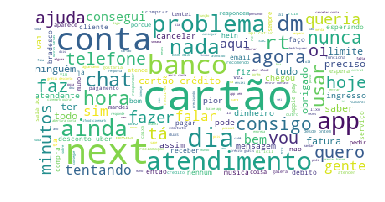

In [96]:
# WordCloud
data_pos_filtered = " ".join(tweet for tweet in data_pos_filtered['text'])
wordcloud = WordCloud(max_font_size = 50, stopwords = stopwords, background_color = 'white').generate(text)
wordcloud.to_file("nouns_user_pos.png")
plt.imshow(wordcloud)
plt.axis("off")

*Top 10 most used words in positive tweets*

In [97]:
count_pos = sorted(word_count(data_pos_filtered).items(), key = itemgetter(1), reverse = True)
wordcount_pos = pd.DataFrame(count_pos, columns=['word', 'counts'])
top10_pos = wordcount_pos[:10]
top10_pos

,word,counts
0,cartão,80
1,conta,45
2,next,41
3,app,30
4,banco,28
5,rt,27
6,crédito,22
7,dm,19
8,fazer,18
9,atendimento,18


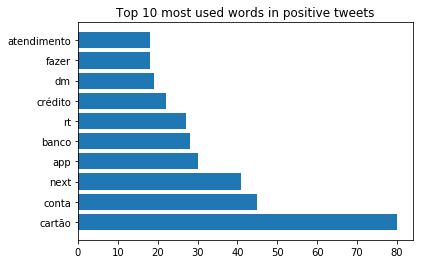

In [104]:
# Dataset
height = top10_pos.counts
bars = top10_pos.word
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

# Create title
plt.title('Top 10 most used words in positive tweets')
 
# Show graphic
plt.show()

*Negative WordCloud*

In [100]:
# filtrar dataframe com tweets positivos
data_neg_filtered = data[data['sentiment'] == 'neg']
data_neg_filtered

,text,sentiment
0,responde meu problema,neg
8,alô cadê meu limite de crédito que não libera...,neg
10,fico feliz que estajam trabalhando nessas mel...,neg
12,vão ignorar um cliente de vocês serio isso,neg
14,hahahhahahahahahha,neg
22,eu envio e vocês não me respondem,neg
25,eles roubam seu salário não consegue nem tran...,neg
27,e a segunda via que vc nao consegue pedir de...,neg
34,22 minutos esperando um atendente me atender e...,neg
43,acabei de ter um encontro com a gata obrigadoo,neg


(-0.5, 399.5, 199.5, -0.5)

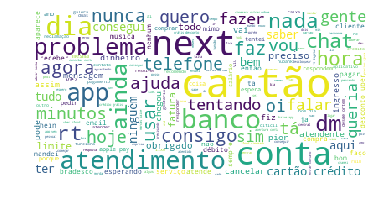

In [101]:
# WordCloud
data_neg_filtered = " ".join(tweet for tweet in data_neg_filtered['text'])
wordcloud = WordCloud(max_font_size = 50, stopwords = stopwords, background_color = 'white').generate(text)
wordcloud.to_file("nouns_user_neg.png")
plt.imshow(wordcloud)
plt.axis("off")

*Top 10 most used words in negative tweets*

In [103]:
count_neg = sorted(word_count(data_neg_filtered).items(), key = itemgetter(1), reverse = True)
wordcount_neg = pd.DataFrame(count_neg, columns=['word', 'counts'])
top10_neg = wordcount_neg[:10]
top10_neg

,word,counts
0,cartão,28
1,next,22
2,conta,20
3,atendimento,16
4,chat,10
5,app,10
6,sim,10
7,fatura,10
8,nada,9
9,dia,9


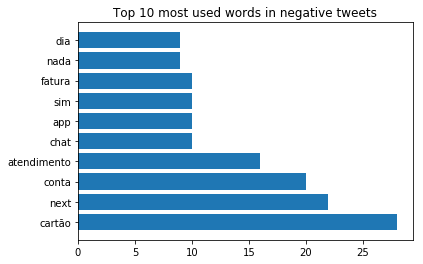

In [105]:
# Dataset
height = top10_neg.counts
bars = top10_neg.word
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

# Create title
plt.title('Top 10 most used words in negative tweets')
 
# Show graphic
plt.show()